# 통계적 가설 검증

1. 기술 통계
  - 데이터를 요약해 설명하는 통계 기법
  - ex) 사람들이 받는 월급을 집계해 전체 월급 평균 구하기

2. 추론 통계
  - 단순히 숫자를 요약하는 것을 넘어 어떤 값이 발생할 확률을 계산하는 통계 기법
  - ex) 수집된 데이터에서 성별에 따라 월급이 차이가 있는 것으로 나타났을 때, 이런 차이가 우연히 발생할 확률을 계산
-----
<br>

## 데이터 EDA 분석 결과

* 이상치:방법용 cctv가 0개인 곳은 성동구이고, 관악구는 비거주용 주거 비율이 가장 높다. 그리고 종로구와 중구에서 서울시의 모든 자치구 대비 치안설비가 가장 낮았다.
* 결측치: 없음
* 1인가구와 가장 상관성이 높았던 변수는 고령인구수, 치안시설비, 5대범죄발생수, 범죄율, 인구밀도, 비거주용 주거 비율, cctv, 유흥업소비, 여성인구비, 단독주택비율 순으로 높았다.

<br>

----
<br>

## 초기 가설 설정
1. 1인가구는 매년 증가하고 있을 것이다. -> 기술 통계 (시각화)
2. 1인 가구가 증가함에 따라, 5대 범죄율도 증가할 것이다. -> 추론 통계 (1인 가구 증가폭이 가장 가파른 oo구의 2018년도 범죄율과 2022년도 범죄율 t-test 결과)
3. 1인가구의 특화범죄도 증가하고 있을 것이다. -> 추론 통계 (1인 가구 증가폭이 가장 가파른 oo구의 2018년도 특화 범죄와 2019년도 특화범죄 t-test 결과)
4. 1인가구가 밀집된 지역의 범죄율이 높을 것이다. -> 추론 통계(서울시 5개년 1인가구 밀집 지역 비율 1위인 oo구의 범죄율과 다른 임의의 1개 구의 범죄율의 t-test 결과)


## 환경 설정

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
!pip install plotly

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import plotly.express as px

pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000
plt.rc('font', family='NanumBarunGothic')

## 1. 서울시 전체 구의 1가구 수는 매년 증가하고 있을 것이다.

> z1_001_서울시18to22_1인가구수.xlsx 사용




## 번외

1인가구 비율을 각 구별 중 1인가구 비율 뽑기

In [ ]:
df_a = pd.read_excel('/content/drive/MyDrive/GoH project/검증 데이터 만들기/origin/인구/구별 1인가구 비율.xlsx')
df_a = df_a[['지역구', '순위']]
df_a

,지역구,순위
0,종로구,5
1,중구,3
2,용산구,9
3,성동구,14
4,광진구,4
5,동대문구,6
6,중랑구,15
7,성북구,16
8,강북구,13
9,도봉구,22


### 1. 서울시 구별 1인가구 증가 추이와 밀집지역 시각화
* 서울시 전체 구별 1인가구는 대체로 5년 동안 고르게 증가 중이다.
* 2022년도 기준 1인가구 수가 가장 많이 밀집된 구는 "관악구"이며 145,433 가구가 거주한다. 이는 서울시 전체의 oo%이다.

* 2022년도 기준 1인가구 수가 가장 적게 밀집된 구는 "중구"이며 25,247 가구가 거주한다. 이는 서울시 전체의 00%이다.


In [ ]:
# 데이터
df = pd.read_excel('/content/drive/MyDrive/GoH project/검증 데이터 만들기/origin/가설 검증/z1_001_서울시18to22_1인가구수.xlsx')
df

,지역구,연도,1인가구 수
0,종로구,2018,25326
1,중구,2018,20803
2,용산구,2018,34240
3,성동구,2018,40706
4,광진구,2018,56337
5,동대문구,2018,55593
6,중랑구,2018,49207
7,성북구,2018,55136
8,강북구,2018,40872
9,도봉구,2018,30848


In [ ]:
# 지역구 이름만 추출
f = df.groupby(['지역구', '연도'])['1인가구 수'].mean().reset_index()
a = f.iloc[:,0].unique()
arr = [i.replace("\u3000", "") for i in a]

In [ ]:
# 25개구 데이터 분리
for i in range(25):
  globals()[chr(i+97)+'_df'] = f.iloc[5*i:5*i+5]
  # globals()[chr(i+97)+'_one_house'] = globals()[chr(i+97)+'_df'].iloc[:,1]
  globals()[chr(i+97)+'_1인가구'] = globals()[chr(i+97)+'_df'].iloc[:,2]
  # print(globals()[chr(i+97)+'_df'], globals()[chr(i+97)+'_one_house'], globals()[chr(i+97)+'year'])

print(c_df)
print(c_1인가구)

       지역구    연도   1인가구 수
10  　　　강북구  2018  40872.0
11  　　　강북구  2019  42791.0
12  　　　강북구  2020  45685.0
13  　　　강북구  2021  48428.0
14  　　　강북구  2022  51134.0
10    40872.0
11    42791.0
12    45685.0
13    48428.0
14    51134.0
Name: 1인가구 수, dtype: float64


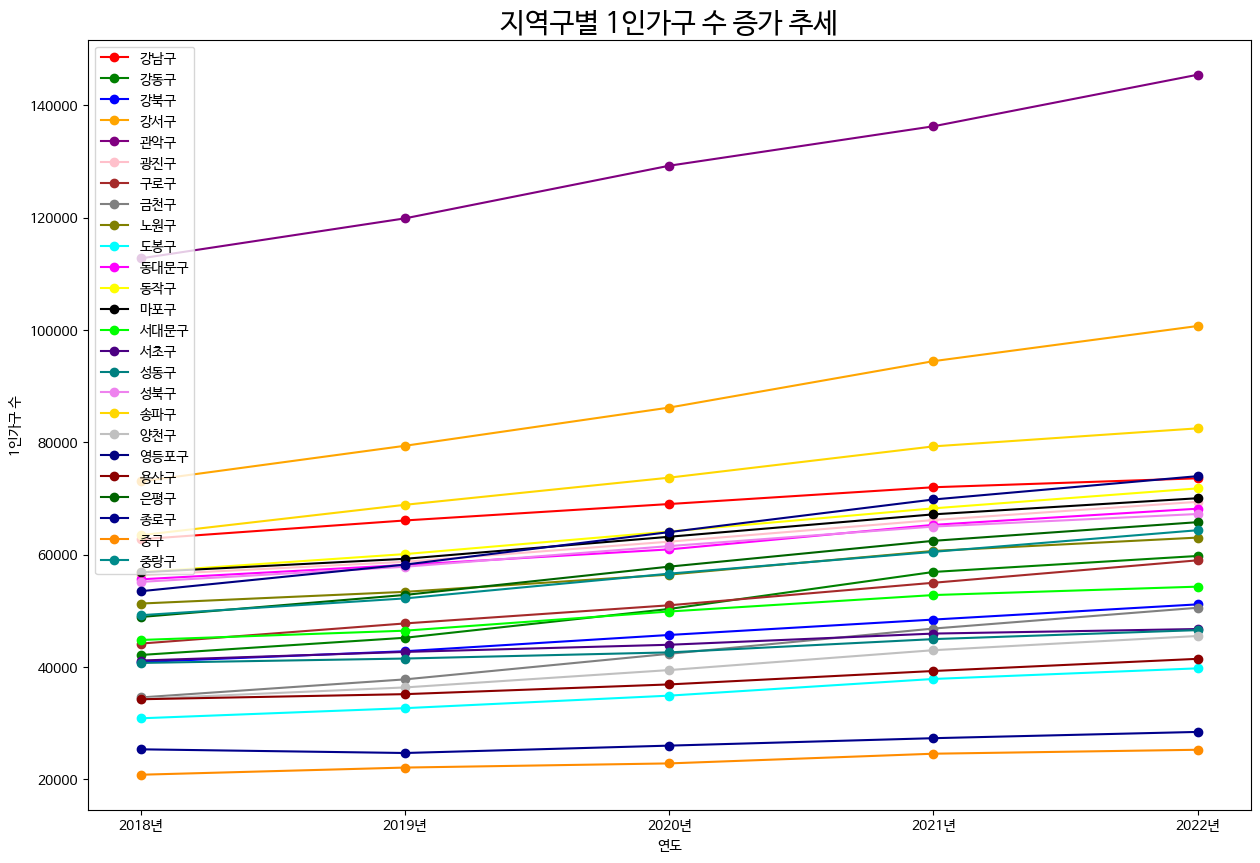

In [ ]:
fig = plt.figure(figsize=(15,10))

# x축
years = ['2018년','2019년','2020년','2021년','2022년']
# 원하는 색상을 직접 선택하여 사용
colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink', 'brown', 'gray', 'olive', 'cyan', 'magenta', 'yellow', 'black', 'lime', 'indigo', 'teal', 'violet', 'gold', 'silver', 'navy', 'darkred', 'darkgreen', 'darkblue', 'darkorange', 'darkcyan', 'darkbrown']

# 캔버스 색상 설정
ax = fig.add_subplot()

# 그림 뼈대(프레임) 생성
# 선 그래프 생성
for i in range(25):
  ch = globals()[chr(i+97)+'_1인가구']
  ax.plot(years, ch, marker='o', label=arr[i], color=colors[i])

ax.legend()

# 범례
plt.title('지역구별 1인가구 수 증가 추세', fontsize=20)
plt.xlabel('연도')
plt.ylabel('1인가구 수')

# 타이틀 설정
plt.show()

In [ ]:
single_households = df[df['연도']==2022].sort_values(by='1인가구 수', ascending=False).reset_index().iloc[:,1:]
# 전체 1인가구 수 계산
total_single_households = single_households['1인가구 수'].sum()

# 각 구가 차지하는 1인가구 수의 비율 계산
single_households['비율'] = (single_households['1인가구 수'] / total_single_households) * 100
single_households

# 1인가구 수의 랭크
single_households['1인가구 순위'] = single_households['1인가구 수'].rank(ascending=False).astype(int)
single_households

,지역구,연도,1인가구 수,비율,1인가구 순위
0,관악구,2022,145433,9.297673,1
1,강서구,2022,100695,6.437530,2
2,송파구,2022,82473,5.272579,3
3,영등포구,2022,73962,4.728463,4
4,강남구,2022,73579,4.703977,5
5,동작구,2022,71782,4.589093,6
6,마포구,2022,70030,4.477086,7
7,광진구,2022,69391,4.436234,8
8,동대문구,2022,68169,4.358111,9
9,성북구,2022,67222,4.297568,10


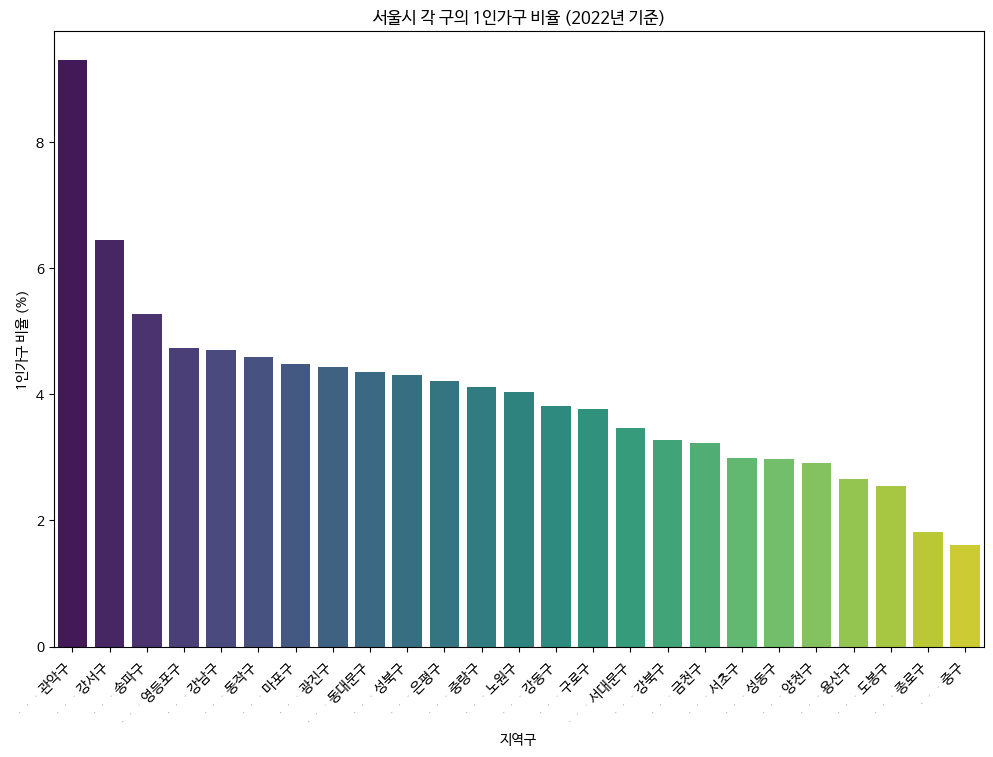

In [ ]:
# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='지역구', y='비율', data=single_households, palette='viridis')
plt.title('서울시 각 구의 1인가구 비율 (2022년 기준)')
plt.xlabel('지역구')
plt.ylabel('1인가구 비율 (%)')
plt.xticks(rotation=45, ha='right')  # x축 라벨 회전
plt.show()

### 2. 서울시 구별 1인가구 증가폭이 가장 많은 구
* 서울시 구별 1인가구 증가폭이 가장 많은 구는 금천구이며, 5년전 대비 46.2% 증가했다.
* 서울시 구별 1인가구 증가폭이 가장 적은 구는 종로구이며, 5년전 대비 12.2% 증가했다.

In [ ]:
# 2018년과 2022년의 1인가구 수를 가져와서 증가 폭 계산
result = []
for region in df['지역구'].unique():
    data_region = df.loc[df['지역구'] == region]
    one_person_household_2018 = data_region.loc[data_region['연도'] == 2018, '1인가구 수'].values[0]
    one_person_household_2022 = data_region.loc[data_region['연도'] == 2022, '1인가구 수'].values[0]
    increase_percentage = ((one_person_household_2022 - one_person_household_2018) / one_person_household_2018) * 100
    result.append({'지역구': region, '증가폭(%)': increase_percentage})

# 결과 출력
result_df = pd.DataFrame(result)
result_df = result_df.sort_values(by='증가폭(%)', ascending=False)
result_df['1인가구 증가폭 순위'] = result_df['증가폭(%)'].rank(ascending=False)
result_df

,지역구,증가폭(%),1인가구 증가폭 순위
17,금천구,46.186784,1.0
24,강동구,41.841143,2.0
18,영등포구,38.306188,3.0
15,강서구,37.917574,4.0
11,은평구,34.529946,5.0
16,구로구,33.580213,6.0
14,양천구,32.643424,7.0
6,중랑구,30.741561,8.0
23,송파구,29.979039,9.0
20,관악구,29.006591,10.0


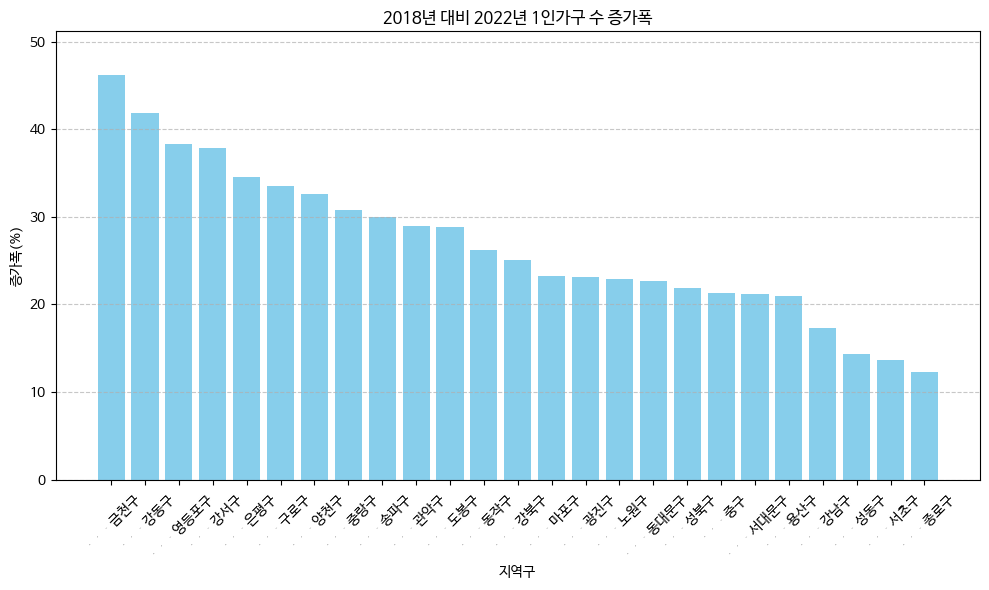

In [ ]:
# 바 차트로 시각화
plt.figure(figsize=(10, 6))
plt.bar(result_df['지역구'], result_df['증가폭(%)'], color='skyblue')
plt.xlabel('지역구')
plt.ylabel('증가폭(%)')
plt.title('2018년 대비 2022년 1인가구 수 증가폭')
plt.ylim(0, max(result_df['증가폭(%)']) + 5)  # y축 범위 조절
plt.xticks(rotation=45)  # x축 레이블 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 2. 1인가구가 증가함에 따라 5대 범죄율도 증가할 것이다. -> NO! 5대 범죄율은 감소하고 있다.
> 5대 범죄란, '살인', '강도', '강간·강제추행', '절도', '폭력'을 말함

1. 서울시 25개 구의 2018년도 대비 2022년도의 범죄율 "대응 표본 t 검정" 결과
2. 1인가구 증가폭이 가장 많았던 금천구의 2018년도 대비 2022년도 범죄율의 증가율 결과

> z5_서울시 5대 범죄 발생현황 통계.xlsx 사용



In [ ]:
df_z5 = pd.read_excel('/content/drive/MyDrive/GoH project/검증 데이터 만들기/origin/가설 검증/z5_서울시 5대 범죄 발생현황 통계.xlsx')
df_z5.head()

,지역구,시점,살인,강도,강간·강제추행,절도,폭력,5대 범죄 합계
0,종로구,2018,6,3,236,1483,1962,3690
1,종로구,2019,4,7,238,1515,2082,3846
2,종로구,2020,9,7,192,1183,1711,3102
3,종로구,2021,6,4,156,1079,1467,2712
4,종로구,2022,2,8,228,1313,1587,3138


#### 1. 서울시 26개 구의 2018년도 대비 2022년도 범죄율 "대응 표본 t검정" 결과
* 2018년 대비 2022년 5대 범죄율은 감소했음

In [ ]:
seoul_2018_crime = df_z5[df_z5['시점']==2018][['지역구','5대 범죄 합계']].reset_index().iloc[:,1:]
seoul_2022_crime = df_z5[df_z5['시점']==2020][['지역구','5대 범죄 합계']].reset_index().iloc[:,1:]
seoul_2018_crime

,지역구,5대 범죄 합계
0,종로구,3690
1,중구,4030
2,용산구,3411
3,성동구,2457
4,광진구,3915
5,동대문구,3680
6,중랑구,4288
7,성북구,3042
8,강북구,3437
9,도봉구,2249


**1. 정규성 있는지 확인하기**<br>
1) 정규성이 있는 확인하는 이유<br>
대응 표본 t 검정에 사용되는 데이터 셋의 개수가 30개 미만이기 때문에 정규성을 대표하는지 증명해야 함.
<br><br>
2) 정규성 인증 방식<br>
정규성(normality)을 확인하는 방법 중 하나는 적절한 통계적 검정(test)을 사용하는 것입니다. <br>대표적인 정규성 검정 방법으로는 샤피로-윌크 검정(Shapiro-Wilk test)이 있습니다. 이 검정은 표본이 정규 분포를 따르는지 여부를 검정합니다.<br>
이 코드에서는 shapiro 함수를 사용하여 샤피로-윌크 검정을 수행하고, 결과를 출력합니다. 검정의 귀무가설은 "데이터가 정규 분포를 따른다"이며, 일반적으로 유의수준 0.05를 사용합니다. p-value가 유의수준보다 작으면 귀무가설을 기각하고, 데이터는 정규 분포를 따르지 않는다고 판단합니다.

**1-1. 2018년도 서울시 5대 범죄율 데이터는 정규 분포를 따른다. 즉, 정규성이 존재함**

In [ ]:
from scipy.stats import shapiro

df_2018 = seoul_2018_crime.iloc[:,1]

# 샤피로-윌크 검정 수행
statistic, p_value = shapiro(df_2018)

# 결과 출력
print(f"통계량(Statistic): {statistic}, p-value: {p_value}")

# p-value를 기준으로 유의수준 설정
alpha = 0.01

# p-value와 유의수준을 비교하여 결과 출력
if p_value > alpha:
    print("2018 데이터는 정규 분포를 따릅니다. (귀무가설을 기각하지 못함)")
else:
    print("2018 데이터는 정규 분포를 따르지 않습니다. (귀무가설 기각)")

통계량(Statistic): 0.9371656775474548, p-value: 0.12729471921920776
2018 데이터는 정규 분포를 따릅니다. (귀무가설을 기각하지 못함)


**1-2. 2022년도 서울시 5대 범죄율 데이터는 정규 분포를 따른다. 즉, 정규성이 존재함**

In [ ]:
df_2022 = seoul_2022_crime.iloc[:,1]

# 샤피로-윌크 검정 수행
statistic, p_value = shapiro(df_2022)

# 결과 출력
print(f"통계량(Statistic): {statistic}, p-value: {p_value}")

# p-value를 기준으로 유의수준 설정
alpha = 0.01

# p-value와 유의수준을 비교하여 결과 출력
if p_value > alpha:
    print("2022 데이터는 정규 분포를 따릅니다. (귀무가설을 기각하지 못함)")
else:
    print("2022 데이터는 정규 분포를 따르지 않습니다. (귀무가설 기각)")

통계량(Statistic): 0.8938969969749451, p-value: 0.013543200679123402
2022 데이터는 정규 분포를 따릅니다. (귀무가설을 기각하지 못함)


In [ ]:
# 비교할 집단 합치기
seoul_2018_vs_2022_crime = pd.merge(seoul_2018_crime, seoul_2022_crime, how='left', on='지역구')
seoul_2018_vs_2022_crime.columns = ['지역구', '2018 5대 범죄 합계', '2022 5대 범죄 합계']
seoul_2018_vs_2022_crime

,지역구,2018 5대 범죄 합계,2022 5대 범죄 합계
0,종로구,3690,3102
1,중구,4030,3411
2,용산구,3411,2969
3,성동구,2457,2362
4,광진구,3915,3601
5,동대문구,3680,3401
6,중랑구,4288,3726
7,성북구,3042,2567
8,강북구,3437,2770
9,도봉구,2249,2179


**2. 대응 표본 t 검정**


In [ ]:
from scipy import stats
before = np.array(seoul_2018_vs_2022_crime['2018 5대 범죄 합계'])
after = np.array(seoul_2018_vs_2022_crime['2022 5대 범죄 합계'])

# 대응 표본 t 검정
paired_ttest_result = stats.ttest_rel(after, before)
print('Statistic(t-value): %.3f p-value: %.28f'%paired_ttest_result)

Statistic(t-value): -5.488 p-value: 0.0000121510783955632473574832



대응 표본 t-검정(related samples t-test) 결과로 나온 통계량(statistic)과 p-value를 해석하는 방법은 다음과 같습니다.

- Statistic(t-value): 이 값은 t-검정 통계량으로, 두 집단 간의 차이를 나타냅니다. 부호는 평균 차이의 방향을 나타내며, 값의 크기는 해당 차이가 얼마나 큰지를 나타냅니다. 음수인 경우는 첫 번째 집단의 평균이 더 작음을 나타냅니다. 즉 2022년도의 범죄가 2018년도 범죄보다 적어졌음을 의미합니다.

- p-value: p-value는 귀무가설이 참일 때, 해당 통계량이 나타날 확률을 의미합니다. 여기서는 p-value가 매우 작은 값(0.000012151...)으로 나타나 있습니다. 이는 귀무가설을 기각할 충분한 통계적 증거가 있다는 것을 나타냅니다.

사용한 유의수준이 일반적인 0.01라면, p-value가 0.01보다 작기 때문에 귀무가설을 기각할 수 있습니다.

매우 작은 p-value는 대체로 우연이 아니라 실제로 효과가 있다는 강력한 증거로 간주됩니다.
따라서 해당 결과를 종합해보면, 두 집단 간의 평균 차이가 통계적으로 유의미하며, t-검정 통계량이 음수이므로 첫 번째 집단의 값이 작다는 것을 시사합니다.

In [ ]:
# 평균
diff_result = after - before
diff_result.mean()

-370.76

2018년도 이후 2022년에 범죄율은 평균적으로 370건 감소했다.
시각화를 통해 before, after의 데이터 분포도를 히스토그램으로 살펴보자

<ipython-input-86-496d2e61a1b7>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-86-496d2e61a1b7>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




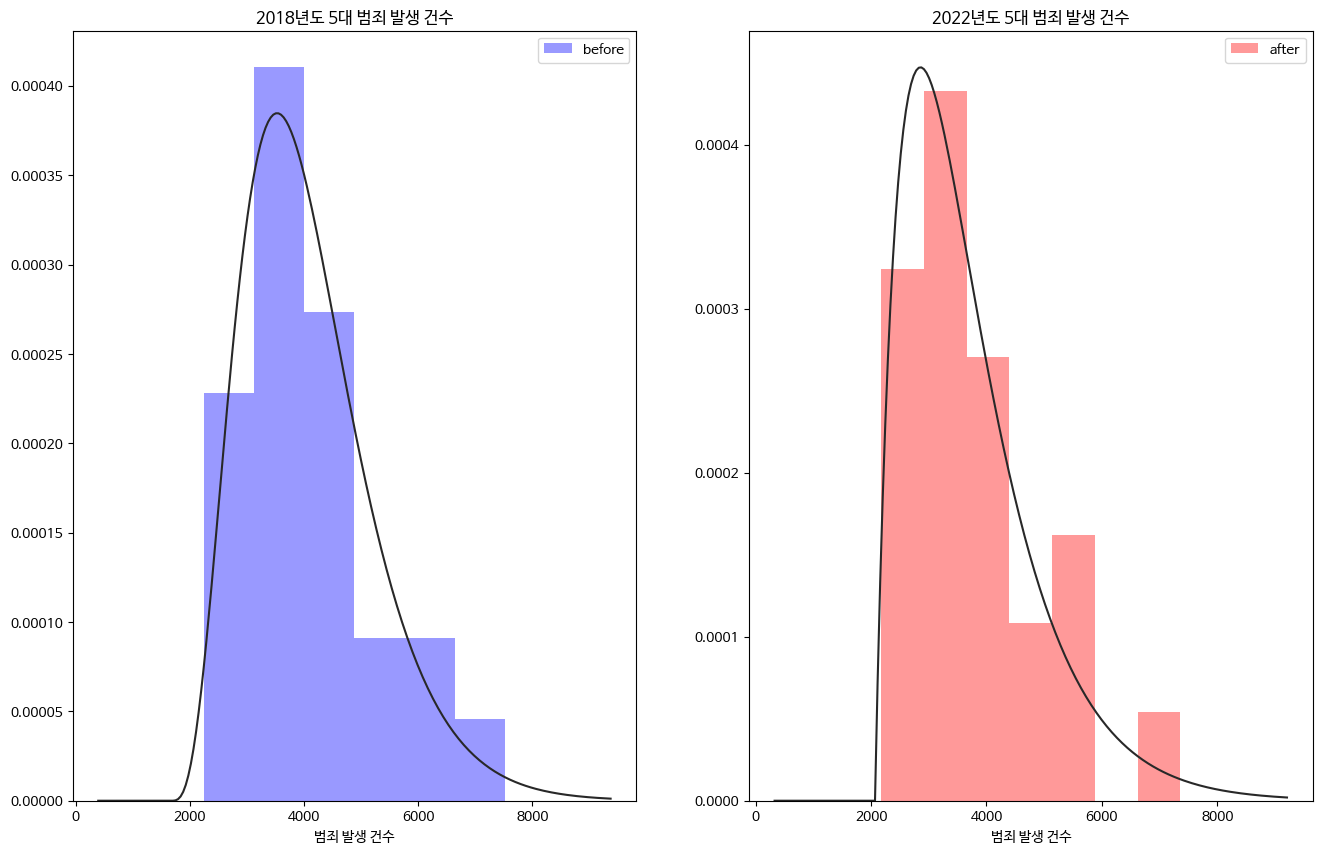

In [ ]:
plt.figure(figsize=(16,22))

ax1 = plt.subplot(221)
ax1 = sns.distplot(before, kde=False, fit=stats.gamma, label='before', color='blue')
ax1.set(xlabel='지역구', ylabel='범죄 발생 건수' title='2018년도 5대 범죄 발생 건수')
plt.legend()

ax1 = plt.subplot(222)
ax2 = sns.distplot(after, kde=False, fit=stats.gamma, label='after', color='red')
ax2.set(xlabel='지역구', ylabel='범죄 발생 건수', title='2022년도 5대 범죄 발생 건수')

plt.legend()
plt.show()

<ipython-input-87-90a559c5c32b>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-87-90a559c5c32b>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




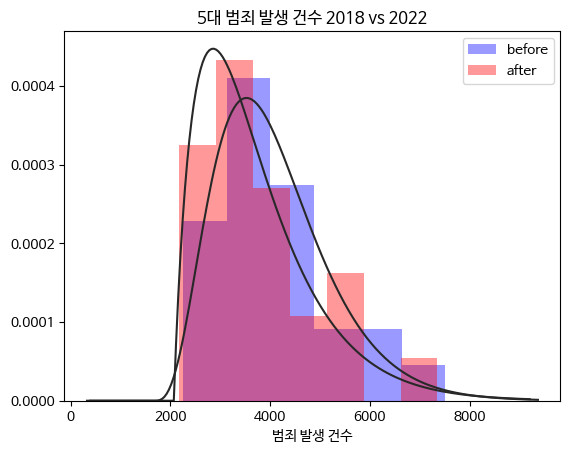

In [ ]:
ax3 = plt.subplots()
ax3 = sns.distplot(before, kde=False, fit=stats.gamma, label='before', color='blue')
ax3 = sns.distplot(after, kde=False, fit=stats.gamma, label='after', color='red')
ax3.set(xlabel='범죄 발생 건수', title='5대 범죄 발생 건수 2018 vs 2022')

plt.legend()
plt.show()

#### 2. 1인가구 증가폭이 가장 많았던 금천구의 2018년도 대비 2022년도 5대 범죄 종목간 건수 증가율 시각화

In [ ]:
gold = df_z5[df_z5['지역구']=='관악구']
# gold = df_z5
gold

,지역구,시점,살인,강도,강간·강제추행,절도,폭력,5대 범죄 합계
100,관악구,2018,9,10,352,2012,2643,5026
101,관악구,2019,13,10,408,2223,2674,5328
102,관악구,2020,12,3,403,2229,2614,5261
103,관악구,2021,8,7,321,1860,2248,4444
104,관악구,2022,10,9,327,1966,2567,4879


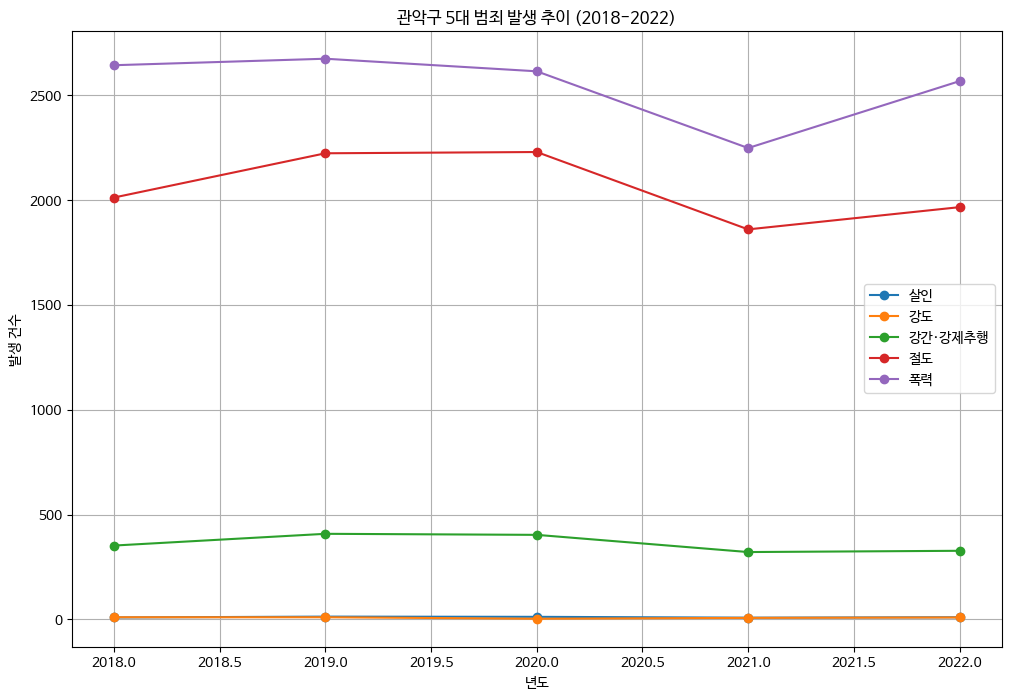

In [ ]:
# 연도별 살인, 강도, 강간·강제추행, 절도, 폭력의 증가 추이 시각화

plt.figure(figsize=(12, 8))

crimes = ['살인', '강도', '강간·강제추행', '절도', '폭력']
for crime in crimes:
    plt.plot(gold['시점'], gold[crime], marker='o', label=crime)

plt.title('관악구 5대 범죄 발생 추이 (2018-2022)')
plt.xlabel('년도')
plt.ylabel('발생 건수')
plt.legend()
plt.grid(True)
plt.show()

### 3. 5대 범죄 발생 추이 확인 (구별 1인가구 비율로 sort)


In [ ]:
f18 = df_z5[df_z5['시점']==2018].iloc[:, [0,1,2,3,4,5,6]]
f18.columns = ['지역구', '시점', '18_살인', '18_강도', '18_강간·강제추행', '18_절도', '18_폭력']
f22 = df_z5[df_z5['시점']==2022].iloc[:, [0,1,2,3,4,5,6]]
f22.columns = ['지역구', '시점', '22_살인', '22_강도', '22_강간·강제추행', '22_절도', '22_폭력']
f22

,지역구,시점,22_살인,22_강도,22_강간·강제추행,22_절도,22_폭력
4,종로구,2022,2,8,228,1313,1587
9,중구,2022,1,5,194,1365,1506
14,용산구,2022,5,7,280,978,1697
19,성동구,2022,2,2,125,979,1086
24,광진구,2022,6,-,230,1670,1713
29,동대문구,2022,4,2,125,1556,1566
34,중랑구,2022,2,2,150,1508,1937
39,성북구,2022,3,1,158,1143,1444
44,강북구,2022,5,5,177,872,1773
49,도봉구,2022,3,-,70,969,1099


In [ ]:
q = pd.merge(f18, f22, how='left', on='지역구')
q.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역구         25 non-null     object
 1   시점_x        25 non-null     int64 
 2   18_살인       25 non-null     object
 3   18_강도       25 non-null     object
 4   18_강간·강제추행  25 non-null     int64 
 5   18_절도       25 non-null     int64 
 6   18_폭력       25 non-null     int64 
 7   시점_y        25 non-null     int64 
 8   22_살인       25 non-null     object
 9   22_강도       25 non-null     object
 10  22_강간·강제추행  25 non-null     int64 
 11  22_절도       25 non-null     int64 
 12  22_폭력       25 non-null     int64 
dtypes: int64(8), object(5)
memory usage: 2.7+ KB


In [ ]:
# - 를 0으로
q['18_살인'] = q['18_살인'].astype(int)
q['18_강도'] = pd.to_numeric(q['18_강도'].replace('-', "0"), errors='coerce').astype(int)
q['22_살인'] = pd.to_numeric(q['22_살인'].replace('-', "0"), errors='coerce').astype(int)
q['22_강도'] = pd.to_numeric(q['22_강도'].replace('-', "0"), errors='coerce').astype(int)
# q[['22_강도']] = q[['22_강도']].astype(int)

q

,지역구,시점_x,18_살인,18_강도,18_강간·강제추행,18_절도,18_폭력,시점_y,22_살인,22_강도,22_강간·강제추행,22_절도,22_폭력
0,종로구,2018,6,3,236,1483,1962,2022,2,8,228,1313,1587
1,중구,2018,2,11,207,1855,1955,2022,1,5,194,1365,1506
2,용산구,2018,1,3,331,1096,1980,2022,5,7,280,978,1697
3,성동구,2018,2,5,126,999,1325,2022,2,2,125,979,1086
4,광진구,2018,7,2,229,1769,1908,2022,6,0,230,1670,1713
5,동대문구,2018,2,5,145,1447,2081,2022,4,2,125,1556,1566
6,중랑구,2018,4,3,174,1526,2581,2022,2,2,150,1508,1937
7,성북구,2018,7,1,183,1164,1687,2022,3,1,158,1143,1444
8,강북구,2018,8,7,188,1112,2122,2022,5,5,177,872,1773
9,도봉구,2018,1,5,113,781,1349,2022,3,0,70,969,1099


In [ ]:
q.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역구         25 non-null     object
 1   시점_x        25 non-null     int64 
 2   18_살인       25 non-null     int64 
 3   18_강도       25 non-null     int64 
 4   18_강간·강제추행  25 non-null     int64 
 5   18_절도       25 non-null     int64 
 6   18_폭력       25 non-null     int64 
 7   시점_y        25 non-null     int64 
 8   22_살인       25 non-null     int64 
 9   22_강도       25 non-null     int64 
 10  22_강간·강제추행  25 non-null     int64 
 11  22_절도       25 non-null     int64 
 12  22_폭력       25 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 2.7+ KB


In [ ]:
q['살인'] = (((q['22_살인'] - q['18_살인'])/q['18_살인']))*100
q['강도'] = (((q['22_강도'] - q['18_강도'])/q['18_강도']))*100
q['강간·강제추행'] = (((q['22_강간·강제추행'] - q['18_강간·강제추행'])/q['18_강간·강제추행']))*100
q['절도'] = (((q['22_절도'] - q['18_절도'])/q['18_절도']))*100
q['폭력'] = (((q['22_폭력'] - q['18_폭력'])/q['18_폭력']))*100
qq = q.iloc[:, [0, 13,14,15,16,17]].round(2)

special_metled = pd.melt(qq, id_vars=['지역구'], var_name='5대범죄', value_name='변화량')
# special_melted = pd.melt(special, id_vars=['지역구'], var_name='침입방법', value_name='변화량')
# special_metled

In [ ]:
al = [ i.replace("\u3000", "") for i in df_a['지역구'].tolist()]
df_a['지역구'] = al

In [ ]:
qq = pd.merge(special_metled, df_a, how='left', on='지역구')
qq = qq.sort_values(by='순위', ascending=True)
qq

,지역구,5대범죄,변화량,순위
95,관악구,절도,-2.29,1
120,관악구,폭력,-2.88,1
45,관악구,강도,-10.00,1
70,관악구,강간·강제추행,-7.10,1
20,관악구,살인,11.11,1
92,금천구,절도,-4.28,2
17,금천구,살인,-66.67,2
42,금천구,강도,-57.14,2
67,금천구,강간·강제추행,-36.50,2
117,금천구,폭력,-30.60,2


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



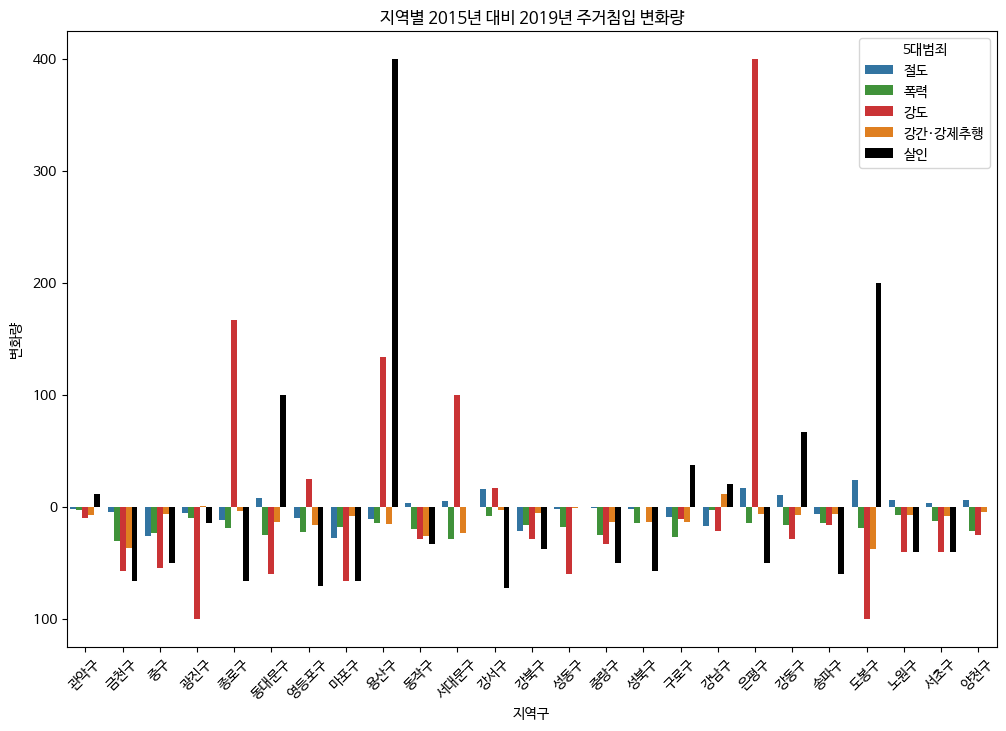

In [ ]:
# 각 카테고리에 대해 사용할 색상 리스트 정의
colors = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#000000"]

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='지역구', y='변화량', hue='5대범죄', data=qq, palette=colors)
plt.title('지역별 2015년 대비 2019년 주거침입 변화량')
plt.xlabel('지역구')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.ylabel('변화량')
plt.show()

## 3. 1인가구의 증가에 따라 1인가구 특화 범죄도 증가할 것이다.
> 1인가구 특화범죄란, '주거침입'을 말함. 주거침입의 종류에는, 문단속, 시건장치, 시건장치파손, 문파손 등으로 나뉜다.

서울시 25개 구의 2015년도 대비 2019년도의 1인가구 특화 범죄 "대응 표본 t 검정" 결과<br>
-> 데이터 부족으로 정규성을 확보하지 못함으로, 2015년과 2019년 1인가구 특화범죄 증감추이 확인해봄

> z10_1인가구 특화 범죄(주거침입).xlsx


In [ ]:
df_z10 = pd.read_excel('/content/drive/MyDrive/GoH project/검증 데이터 만들기/전처리 완료한 엑셀 결과물/231111_1인가구특화범죄.xlsx')
df_z10.head(10)

,년도,지역구,침입방법문단속,침입방법시정장치,침입방법시정장치파손,침입방법문파손,침입방법기타,합계
0,2015,강남구,50,36,117,12,23371,23586
1,2016,강남구,48,42,6,1,23793,23890
2,2017,강남구,49,39,27,19,21034,21168
3,2018,강남구,43,20,1,1,20935,21000
4,2019,강남구,7,13,15,2,20691,20728
5,2015,강동구,29,12,10,1,9385,9437
6,2016,강동구,40,27,19,23,9459,9568
7,2017,강동구,35,23,10,3,8860,8931
8,2018,강동구,5,5,3,0,8250,8263
9,2019,강동구,10,3,4,0,8265,8282


In [ ]:
one_2015_crime = df_z10[df_z10['년도']==2015][['지역구','침입방법문단속', '침입방법시정장치','침입방법시정장치파손', '침입방법문파손', '침입방법기타']].reset_index().iloc[:,1:]
one_2019_crime = df_z10[df_z10['년도']==2019][['지역구','침입방법문단속', '침입방법시정장치','침입방법시정장치파손', '침입방법문파손', '침입방법기타']].reset_index().iloc[:,1:]
one_2019_crime

,지역구,침입방법문단속,침입방법시정장치,침입방법시정장치파손,침입방법문파손,침입방법기타
0,강남구,7,13,15,2,20691
1,강동구,10,3,4,0,8265
2,강북구,34,4,3,2,8397
3,강서구,38,32,4,5,11027
4,관악구,30,13,5,3,11439
5,광진구,58,3,3,1,7834
6,구로구,51,20,5,3,8877
7,금천구,31,8,8,1,6762
8,노원구,10,23,3,9,8623
9,도봉구,27,4,0,1,4903


In [ ]:
from scipy.stats import shapiro

df_2015 = one_2015_crime.iloc[:,1]

# 샤피로-윌크 검정 수행
statistic, p_value = shapiro(df_2018)

# 결과 출력
print(f"통계량(Statistic): {statistic}, p-value: {p_value}")

# p-value를 기준으로 유의수준 설정
alpha = 0.05

# p-value와 유의수준을 비교하여 결과 출력
if p_value > alpha:
    print("2015 데이터는 정규 분포를 따릅니다. (귀무가설을 기각하지 못함)")
else:
    print("2015 데이터는 정규 분포를 따르지 않습니다. (귀무가설 기각)")

통계량(Statistic): 0.9371656775474548, p-value: 0.12729471921920776
2015 데이터는 정규 분포를 따릅니다. (귀무가설을 기각하지 못함)


In [ ]:
from scipy.stats import shapiro

df_2019 = one_2019_crime.iloc[:,1]

# 샤피로-윌크 검정 수행
statistic, p_value = shapiro(df_2022)

# 결과 출력
print(f"통계량(Statistic): {statistic}, p-value: {p_value}")

# p-value를 기준으로 유의수준 설정
alpha = 0.05

# p-value와 유의수준을 비교하여 결과 출력
if p_value > alpha:
    print("2019 데이터는 정규 분포를 따릅니다. (귀무가설을 기각하지 못함)")
else:
    print("2019 데이터는 정규 분포를 따르지 않습니다. (귀무가설 기각)")

통계량(Statistic): 0.8938969969749451, p-value: 0.013543200679123402
2019 데이터는 정규 분포를 따르지 않습니다. (귀무가설 기각)


In [ ]:
# 비교할 집단 합치기
one_2015_vs_2019_crime = pd.merge(one_2015_crime, one_2019_crime, how='left', on='지역구')
one_2015_vs_2019_crime.columns = ['지역구', '2015 침입방법문단속','2015 침입방법시정장치','2015 침입방법시정장치파손','2015 침입방법문파손',
                                  '2015 침입방법기타', '2019 침입방법문단속','2019 침입방법시정장치','2019 침입방법시정장치파손','2019 침입방법문파손',
                                  '2019 침입방법기타']

# one_2015_vs_2019_crime['2019 - 2015 침입방법문단속'] = ((one_2015_vs_2019_crime['2019 침입방법문단속'] - one_2015_vs_2019_crime['2015 침입방법문단속'])/one_2015_vs_2019_crime['2015 침입방법문단속'] ) *100
# one_2015_vs_2019_crime['2019 - 2015 침입방법시정장치'] = ((one_2015_vs_2019_crime['2019 침입방법시정장치'] - one_2015_vs_2019_crime['2015 침입방법시정장치'])/one_2015_vs_2019_crime['2015 침입방법시정장치'])*100
# one_2015_vs_2019_crime['2019 - 2015 침입방법시정장치파손'] = ((one_2015_vs_2019_crime['2019 침입방법시정장치파손'] - one_2015_vs_2019_crime['2015 침입방법시정장치파손'])/ one_2015_vs_2019_crime['2015 침입방법시정장치파손']) * 100
# one_2015_vs_2019_crime['2019 - 2015 침입방법문파손'] = ((one_2015_vs_2019_crime['2019 침입방법문파손'] - one_2015_vs_2019_crime['2015 침입방법문파손'])/one_2015_vs_2019_crime['2015 침입방법문파손'])*100
# one_2015_vs_2019_crime['2019 - 2015 침입방법기타'] = ((one_2015_vs_2019_crime['2019 침입방법기타'] - one_2015_vs_2019_crime['2015 침입방법기타'])/one_2015_vs_2019_crime['2015 침입방법기타'])*100



one_2015_vs_2019_crime['2019 - 2015 침입방법문단속'] = (one_2015_vs_2019_crime['2019 침입방법문단속'] - one_2015_vs_2019_crime['2015 침입방법문단속'])
one_2015_vs_2019_crime['2019 - 2015 침입방법시정장치'] = (one_2015_vs_2019_crime['2019 침입방법시정장치'] - one_2015_vs_2019_crime['2015 침입방법시정장치'])
one_2015_vs_2019_crime['2019 - 2015 침입방법시정장치파손'] = (one_2015_vs_2019_crime['2019 침입방법시정장치파손'] - one_2015_vs_2019_crime['2015 침입방법시정장치파손'])
one_2015_vs_2019_crime['2019 - 2015 침입방법문파손'] = (one_2015_vs_2019_crime['2019 침입방법문파손'] - one_2015_vs_2019_crime['2015 침입방법문파손'])
one_2015_vs_2019_crime['2019 - 2015 침입방법기타'] = (one_2015_vs_2019_crime['2019 침입방법기타'] - one_2015_vs_2019_crime['2015 침입방법기타'])

# one_2015_vs_2019_crime

In [ ]:
# special = one_2015_vs_2019_crime[['지역구', '2019 - 2015 침입방법문단속', '2019 - 2015 침입방법시정장치', '2019 - 2015 침입방법시정장치파손', '2019 - 2015 침입방법문파손', '2019 - 2015 침입방법기타']]
special = one_2015_vs_2019_crime[['지역구', '2019 - 2015 침입방법문단속', '2019 - 2015 침입방법시정장치', '2019 - 2015 침입방법시정장치파손', '2019 - 2015 침입방법문파손']]
special.columns = ['지역구', '문단속 미흡', '시건장치 부족', '시건장치 파손', '문 파손']
# special

In [ ]:
# inf 나오는거 전처리함
special['문 파손'] = special[['문 파손']].replace(np.inf, 0)
special

# 모든 값들 소숫점 2자리 아래 안나오게 함
special = special.round(2)

special_melted = pd.melt(special, id_vars=['지역구'], var_name='침입방법', value_name='변화량')
# special_melted

<ipython-input-104-42a48ab0051d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# 이름 잘못 되서 바꿔줌 ( 영등포 -> 영등포구 )

x = special_melted.sort_values(by="변화량", ascending=False)
name = [i+'구' if i[-1] != '구' else i for i in x['지역구'].tolist() ]
x['지역구'] = name

In [ ]:
# 1인가구 밀집 순위별로 sort하려고 함
name_single = single_households.iloc[:, [0,4]]
name_single['지역구']= [i.replace("\u3000", "")for i in name_single['지역구'].tolist()]
x = pd.merge(x, name_single, how='left', on='지역구')

# 1인가구 증가폭별로 sort하려고 함
a = [i.replace("\u3000", "") for i in result_df['지역구'].tolist()]
result_df['지역구'] = a
result_df['1인가구 증가폭 순위'] = result_df['1인가구 증가폭 순위'].astype(int)
y = pd.merge(x, result_df.iloc[:, [0,2]], how='left', on='지역구')
# y


<ipython-input-106-8af5f63edfe1>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# 1인가구 비율 다시 계산한거
df_a = df_a[['지역구', '순위']]
a = [i.replace("\u3000", "") for i in df_a['지역구'].tolist()]
df_a['지역구'] = a

z = pd.merge(x, df_a, how='left', on='지역구')
# z

In [ ]:
 # 1인가구가 많은 순위로 sort함
#  x = x.sort_values(by='1인가구 순위', ascending=True)
#  x

# 1인가구 증가폭이 높은 순위로 sort함
#  y = y.sort_values(by='1인가구 증가폭 순위', ascending=True)
#  y

 # 1인가구 구내 1인가구 비율이 높은 순위로 sort 함
 z = z.sort_values(by='순위')
 z

,지역구,침입방법,변화량,1인가구 순위,순위
91,관악구,시건장치 파손,-39,1,1
75,관악구,시건장치 부족,-19,1,1
22,관악구,문 파손,2,1,1
19,관악구,문단속 미흡,3,1,1
67,금천구,시건장치 부족,-15,18,2
8,금천구,문단속 미흡,9,18,2
60,금천구,시건장치 파손,-9,18,2
34,금천구,문 파손,-1,18,2
0,중구,시건장치 부족,66,25,3
1,중구,문단속 미흡,53,25,3


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



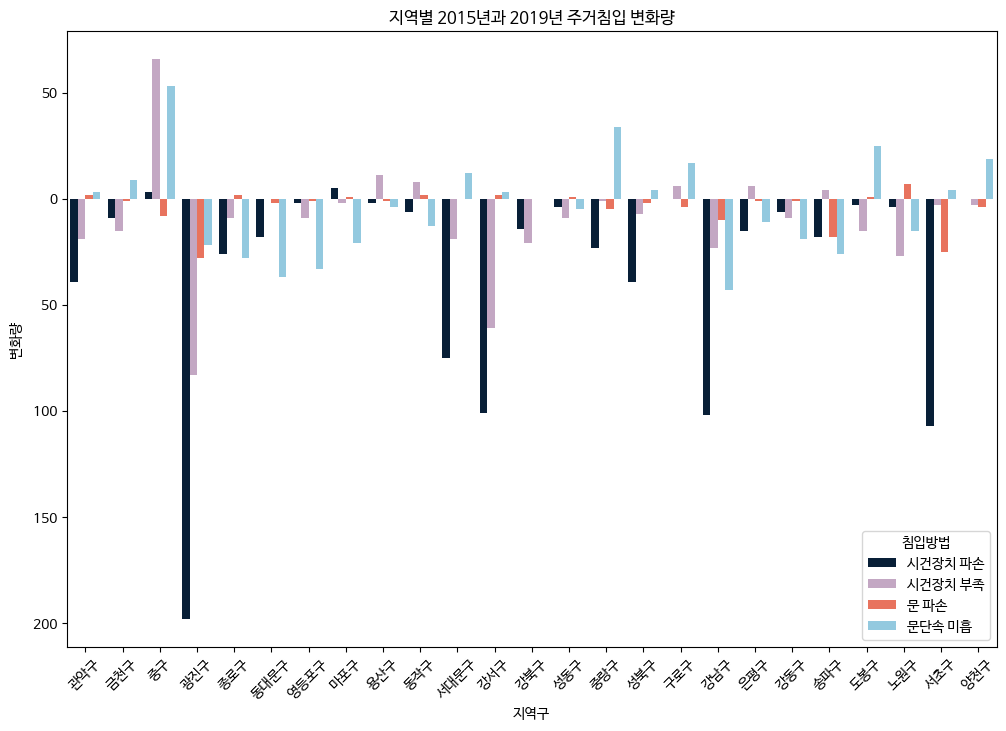

In [ ]:
# 각 카테고리에 대해 사용할 색상 리스트 정의
colors = ["#001f3f", "#C8A2C8", "#FF6347", "#87CEEB"]

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='지역구', y='변화량', hue='침입방법', data=z, palette=colors)
plt.title('지역별 2015년과 2019년 주거침입 변화량')
plt.xlabel('지역구')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.ylabel('변화량')
plt.show()


[이전에 잘못 계산했을 때 해석임]

1인가구 수가 가장 적었던 "중구"에서 2015년에 비해 2019년에 문단속 미흡과 시간장치 부족으로 인한 주거 침입 건수가 증가했다.

그 외에도, 2019년 기준 5년전에 비해 중랑구, 도봉구, 구로구, 양천구 등에서 문단속 미흡으로 인한 주거침입 건수가 상승했다.

또한, 2019년 기준 5년전에 비해 중구, 용산구, 동작구, 구로구, 은평구 등에서 시건장치 부족으로 인한 주거침입 건수가 상승했다.

특히 광진구의 시건장치 파손으로 인한 주거침입 범죄가 많이 줄었는데 기사(http://www.gwangjin.com/21916)에 따르면, 자치구가 기업과 함께 주거환경 취약계층을 위한 주거환경개선 사업을 진행한 결과로 보인다.
<br>
<br>
**📍정리**

다행히도 서울시 전체 구에서 1인가구 특화범죄가 감소했지만, 반대로 중구, 중랑구, 구로구, 도봉구 등에서는 상승하고 있다.

이를 통해서, 1인가구가 밀집되지 않았지만 1인가구 유입이 점점 증가하는 지역에서 주거침입 범죄가 취약하다는 점을 알 수 있다.


##3-1. 1인가구와 주거침입간의 상관성 확인

집단1) 1인가구 밀도 상위 20%: 관악구, 강서구, 송파구, 영등포구, 강남구

집단2) 1인가구 증가폭 상위 20%: 금천구, 강동구, 영등포구, 강서구, 은평구

집단3) 구별 1인가구 비율이 높은 상위 20% 구: 관악구, 금천구, 중구, 광진구, 종로구

In [ ]:
df_z10 = pd.read_excel('/content/drive/MyDrive/GoH project/검증 데이터 만들기/전처리 완료한 엑셀 결과물/231111_1인가구특화범죄.xlsx')
df_z10.head(10)

,년도,지역구,침입방법문단속,침입방법시정장치,침입방법시정장치파손,침입방법문파손,침입방법기타,합계
0,2015,강남구,50,36,117,12,23371,23586
1,2016,강남구,48,42,6,1,23793,23890
2,2017,강남구,49,39,27,19,21034,21168
3,2018,강남구,43,20,1,1,20935,21000
4,2019,강남구,7,13,15,2,20691,20728
5,2015,강동구,29,12,10,1,9385,9437
6,2016,강동구,40,27,19,23,9459,9568
7,2017,강동구,35,23,10,3,8860,8931
8,2018,강동구,5,5,3,0,8250,8263
9,2019,강동구,10,3,4,0,8265,8282


In [ ]:
# 집단1) 1인가구 밀도 상위 20%: 관악구, 강서구, 송파구, 영등포구, 강남구
mo1 = df_z10[df_z10['지역구'].isin(['관악구', '강서구', '송파구', '영등포', '강남구'])]
mo1

# 집단2) 1인가구 증가폭 상위 20%: 금천구, 강동구, 영등포구, 강서구, 은평구
mo2 = df_z10[df_z10['지역구'].isin(['금천구', '강동구', '영등포', '강서구', '은평구'])]
mo2

# 집단3) 구별 1인가구 비율이 높은 상위 20% 구: 관악구, 금천구, 중구, 광진구, 종로구
mo3 = df_z10[df_z10['지역구'].isin(['관악구', '금천구', '중구','광진구', '종로구'])]
mo3

,년도,지역구,침입방법문단속,침입방법시정장치,침입방법시정장치파손,침입방법문파손,침입방법기타,합계
20,2015,관악구,27,32,44,1,11024,11128
21,2016,관악구,24,20,10,2,11800,11856
22,2017,관악구,66,89,13,2,11778,11948
23,2018,관악구,46,25,2,9,11092,11174
24,2019,관악구,30,13,5,3,11439,11490
25,2015,광진구,80,86,201,29,9634,10030
26,2016,광진구,79,77,41,19,9312,9528
27,2017,광진구,72,36,9,1,9120,9238
28,2018,광진구,14,1,2,0,8334,8351
29,2019,광진구,58,3,3,1,7834,7899


In [ ]:
mo1 = mo1.iloc[:,[0,1,7]]
mo2 = mo2.iloc[:,[0,1,7]]
mo3 = mo3.iloc[:,[0,1,7]]
mo1

,년도,지역구,합계
0,2015,강남구,23586
1,2016,강남구,23890
2,2017,강남구,21168
3,2018,강남구,21000
4,2019,강남구,20728
15,2015,강서구,12741
16,2016,강서구,13032
17,2017,강서구,12541
18,2018,강서구,11275
19,2019,강서구,11106


In [ ]:
mo1['합계'] = np.log(mo1.iloc[:, 2]).round(2)
mo2['합계'] = np.log(mo2.iloc[:,2]).round(2)
mo3['합계'] = np.log(mo3.iloc[:,2]).round(2)

<ipython-input-113-8543cb030f66>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
mo3['지역구'].unique().tolist()

['관악구', '광진구', '금천구', '종로구', '중구']

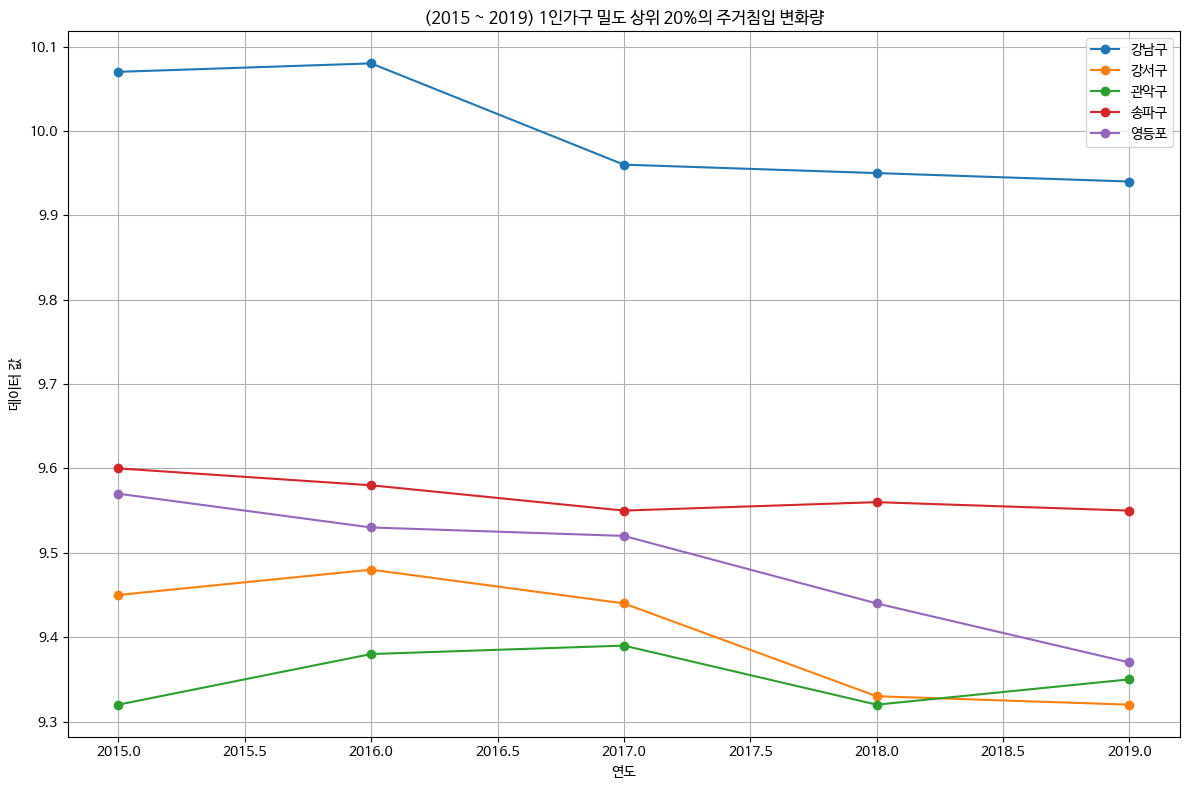

In [ ]:
interested_areas = mo1['지역구'].unique().tolist()

# 각 지역구의 데이터 추출하여 시각화
plt.figure(figsize=(12, 8))

for area in interested_areas:
    data_area = mo1[mo1['지역구'] == area]
    years = data_area['년도']
    plt.plot(years, data_area['합계'], marker='o', label=f'{area}')


plt.title('(2015 ~ 2019) 1인가구 밀도 상위 20%의 주거침입 변화량')
plt.xlabel('연도')
plt.ylabel('데이터 값')
plt.legend()
plt.grid(True)
plt.tight_layout()

# 그래프 출력
plt.show()

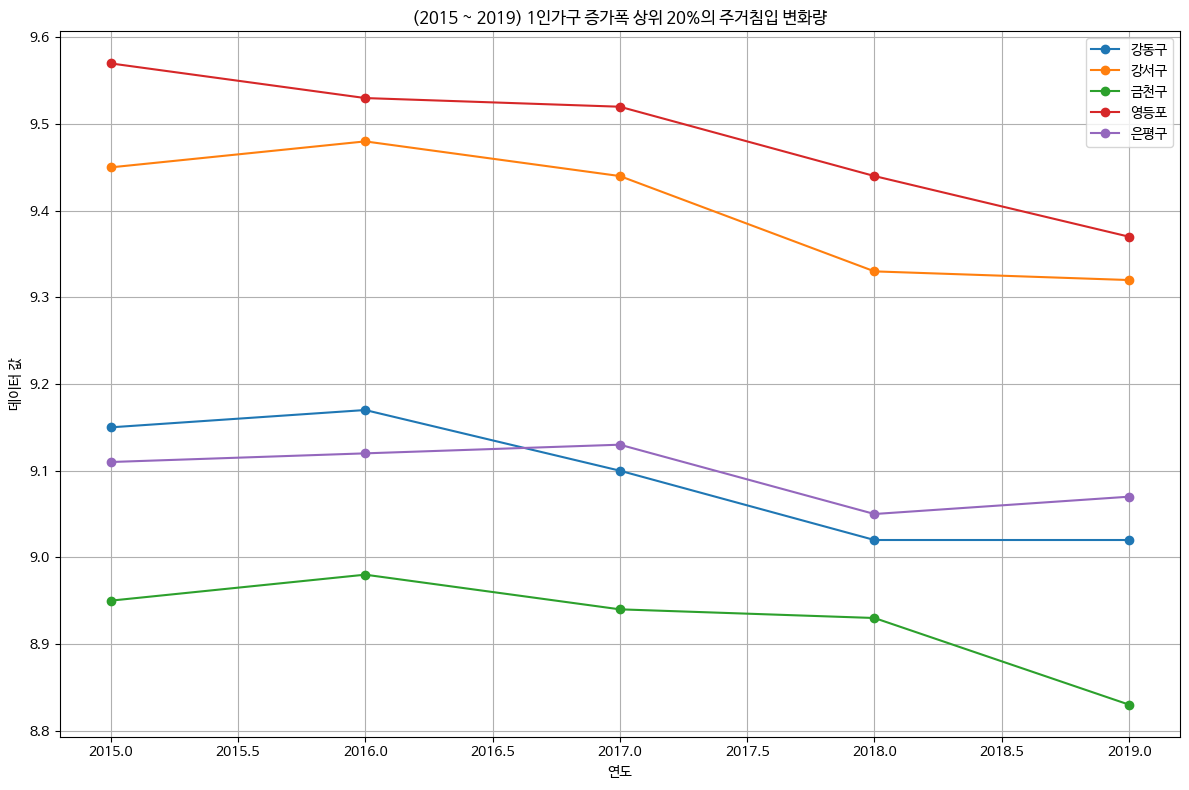

In [ ]:
# 관심 있는 지역구 선택 (관악구, 광진구, 금천구, 종로구, 중구)
interested_areas = mo2['지역구'].unique().tolist()

# 각 지역구의 데이터 추출하여 시각화
plt.figure(figsize=(12, 8))

for area in interested_areas:
    data_area = mo2[mo2['지역구'] == area]
    years = data_area['년도']
    plt.plot(years, data_area['합계'], marker='o', label=f'{area}')


plt.title('(2015 ~ 2019) 1인가구 증가폭 상위 20%의 주거침입 변화량')
plt.xlabel('연도')
plt.ylabel('데이터 값')
plt.legend()
plt.grid(True)
plt.tight_layout()

# 그래프 출력
plt.show()

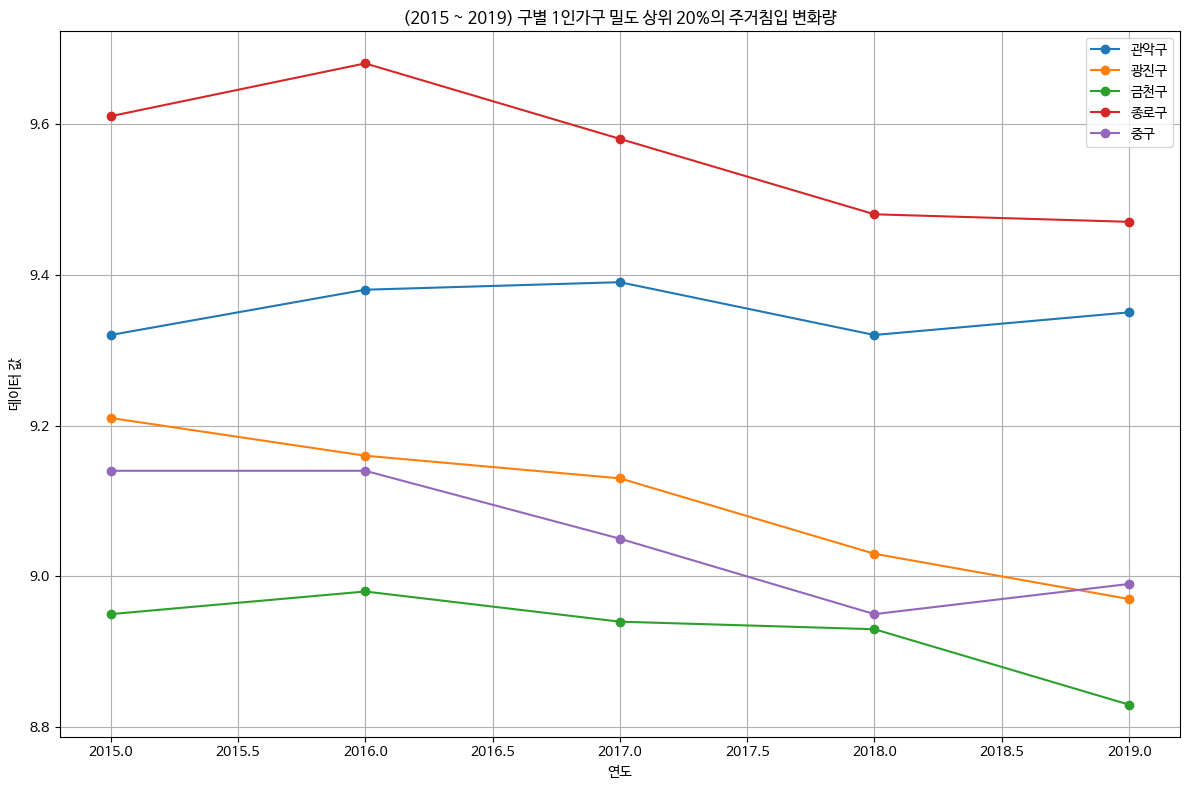

In [ ]:
interested_areas = mo3['지역구'].unique().tolist()

# 각 지역구의 데이터 추출하여 시각화
plt.figure(figsize=(12, 8))

for area in interested_areas:
    data_area = mo3[mo3['지역구'] == area]
    years = data_area['년도']
    plt.plot(years, data_area['합계'], marker='o', label=f'{area}')


plt.title('(2015 ~ 2019) 구별 1인가구 밀도 상위 20%의 주거침입 변화량')
plt.xlabel('연도')
plt.ylabel('데이터 값')
plt.legend()
plt.grid(True)
plt.tight_layout()

# 그래프 출력
plt.show()

## 4. 1인가구가 밀집된 지역의 범죄율이 높을 것이다.
 -> 추론 통계(서울시 5개년 1인가구 밀집 지역 비율 1위인 oo구의 범죄율과 다른 임의의 1개 구의 범죄율의 t-test 결과)

In [ ]:
single_households = df[df['연도']==2019]
single_house_19 = single_households.iloc[:, [0,2]]
single_house_19['1인가구 순위'] = single_house_19['1인가구 수'].rank(ascending=False).astype(int)
single_house_19 = single_house_19.sort_values(by='지역구')
single_house_19['지역구'] = [ i.replace("\u3000", "") for i in single_house_19['지역구']]
single_house_19.sort_values(by='1인가구 순위')

,지역구,1인가구 수,1인가구 순위
45,관악구,119863,1
40,강서구,79371,2
48,송파구,68861,3
47,강남구,66073,4
44,동작구,60088,5
38,마포구,59248,6
29,광진구,58714,7
43,영등포구,58214,8
30,동대문구,58152,9
32,성북구,57832,10


In [ ]:
one_2019_crime = df_z10[df_z10['년도']==2019][['지역구','침입방법문단속', '침입방법시정장치','침입방법시정장치파손', '침입방법문파손', '침입방법기타']].reset_index().iloc[:,1:]
one_2019_crime['주거침입 합계'] = one_2019_crime[['침입방법문단속', '침입방법시정장치','침입방법시정장치파손', '침입방법문파손', '침입방법기타']].sum(axis=1)
one_2019_crime_new = one_2019_crime[['지역구', '주거침입 합계']]
one_2019_crime_new = one_2019_crime_new.sort_values(by='주거침입 합계', ascending=False)
one_2019_crime_new = one_2019_crime_new.reset_index().iloc[:,1:]
one_2019_crime_new['주거침입 노출 순위'] = one_2019_crime_new['주거침입 합계'].rank(ascending=False).astype(int)
one_2019_crime_new['지역구'] = ['강남구',
 '송파구',
 '서초구',
 '종로구',
 '영등포구',
 '관악구',
 '강서구',
 '마포구',
 '구로구',
 '중랑구',
 '은평구',
 '노원구',
 '강북구',
 '강동구',
 '동대문구',
 '중구',
 '광진구',
 '성북구',
 '용산구',
 '양천구',
 '금천구',
 '동작구',
 '서대문구',
 '성동구',
 '도봉구']

In [ ]:
one_2019_crime_new

,지역구,주거침입 합계,주거침입 노출 순위
0,강남구,20728,1
1,송파구,14064,2
2,서초구,13701,3
3,종로구,13015,4
4,영등포구,11725,5
5,관악구,11490,6
6,강서구,11106,7
7,마포구,9616,8
8,구로구,8956,9
9,중랑구,8758,10


In [ ]:

# 데이터 병합
merged_data = pd.merge(single_house_19, one_2019_crime_new, how='left', on='지역구')
merged_data = merged_data[['지역구','1인가구 순위', '주거침입 노출 순위']]


# 역순으로 순위 조정
merged_data['1인가구 순위'] = len(merged_data) - merged_data['1인가구 순위'] + 1
merged_data['주거침입 노출 순위'] = len(merged_data) - merged_data['주거침입 노출 순위'] + 1
# merged_data

# 데이터 프레임 합치기
# merged_data = pd.merge(df, df, on='지역구')

# 그래프 그리기
fig = px.line(merged_data, x='지역구', y=['1인가구 순위', '주거침입 노출 순위'],
              markers=True, labels={'value': '1인가구', 'variable': '항목'},
              line_dash_sequence=['solid', 'dot'])

# 그래프 보여주기
fig.show()

2019년 기준 1인가구 밀집 지역과 주거침입을 시각화한 결과, 어느 정도의 연관성이 있음을 확인 할 수 있다.
1인가구 밀집 지역 상위 20% 중에서 주거침입 노출 순위가 많았던 구는 강남구와 송파구이다.
이 외에도 1인가구가 밀집된 곳에 주거 침입의 위험이 높았던 구는 강동구, 강북구, 구로구, 서초구, 영등포구, 용상구, 종로구, 중구, 중랑구 등이 있다.
이 중에서 특히, 서초구, 종로구, 중구가 1인가구의 밀집정도가 약하지만 주거침입 노출의 위험이 높았다.

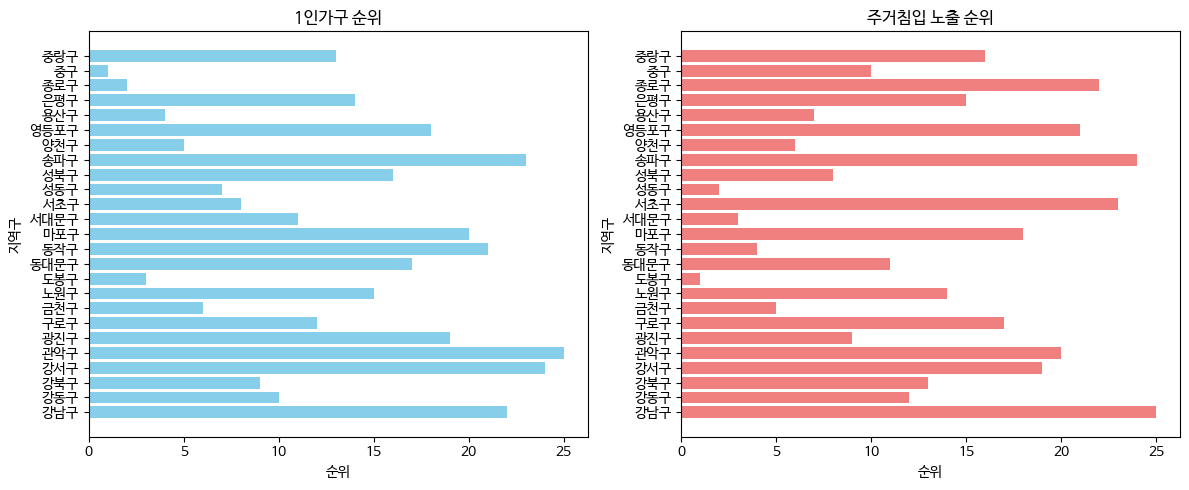

In [ ]:
# 그래프 설정
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 1인가구 순위 그래프
ax1.barh(merged_data['지역구'], merged_data['1인가구 순위'], color='skyblue')
ax1.set_title('1인가구 순위')
ax1.set_xlabel('순위')
ax1.set_ylabel('지역구')

# 주거침입 노출 순위 그래프
ax2.barh(merged_data['지역구'], merged_data['주거침입 노출 순위'], color='lightcoral')
ax2.set_title('주거침입 노출 순위')
ax2.set_xlabel('순위')
ax2.set_ylabel('지역구')

# 그래프 표시
plt.tight_layout()
plt.show()

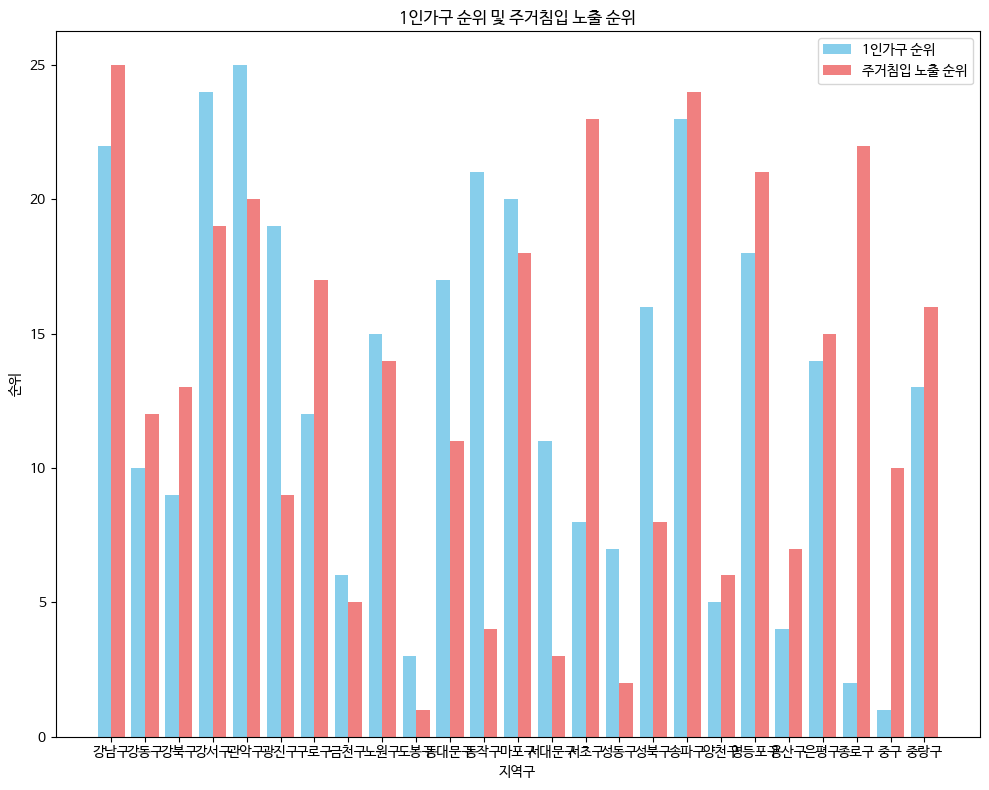

In [ ]:
# 그래프 설정
fig, ax = plt.subplots(figsize=(10, 8))

# 1인가구 순위와 주거침입 노출 순위를 나란히 표현
width = 0.4  # 막대의 너비
bar1 = np.arange(len(merged_data['지역구']))  # 첫 번째 변수의 막대 위치
bar2 = bar1 + width  # 두 번째 변수의 막대 위치

ax.bar(bar1, merged_data['1인가구 순위'], width=width, color='skyblue', label='1인가구 순위')
ax.bar(bar2, merged_data['주거침입 노출 순위'], width=width, color='lightcoral', label='주거침입 노출 순위')

# 축과 레이블 설정
ax.set_xticks(bar1 + width / 2)
ax.set_xticklabels(merged_data['지역구'])
ax.set_xlabel('지역구')
ax.set_ylabel('순위')
ax.set_title('1인가구 순위 및 주거침입 노출 순위')
ax.legend()

# 그래프 표시
plt.tight_layout()
plt.show()

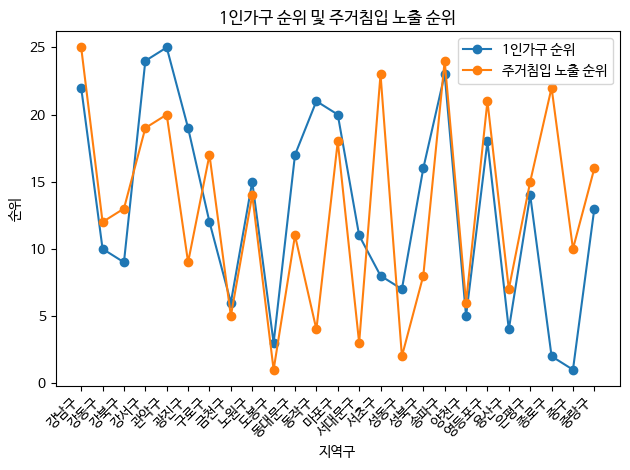

In [ ]:
# 1인가구 순위와 주거침입 노출 순위를 선 그래프로 표현
plt.plot(merged_data['지역구'], merged_data['1인가구 순위'], marker='o', label='1인가구 순위')
plt.plot(merged_data['지역구'], merged_data['주거침입 노출 순위'], marker='o', label='주거침입 노출 순위')

# 축과 레이블 설정
plt.xlabel('지역구')
plt.ylabel('순위')
plt.title('1인가구 순위 및 주거침입 노출 순위')
plt.xticks(rotation=45, ha='right')  # 지역구 이름을 45도 기울여 표시
plt.legend()

# 그래프 표시
plt.tight_layout()
plt.show()

In [ ]:
# 그래프 그리기
fig = px.line(merged_data, x='지역구', y=['1인가구 순위', '주거침입 노출 순위'], markers=True, labels={'value': '순위', 'variable': '항목'})

# 그래프 보여주기
fig.show()

# 4-1. 1인가구 밀집

In [ ]:
n_df = pd.read_excel('/content/drive/MyDrive/GoH project/검증 데이터 만들기/전처리 완료한 엑셀 결과물/가설4.xlsx')
n_df

,지역구,1인가구 순위,범죄율 순위
0,종로구,24,16
1,중구,25,13
2,용산구,21,19
3,성동구,19,24
4,광진구,7,12
5,동대문구,8,15
6,중랑구,12,9
7,성북구,9,22
8,강북구,17,18
9,도봉구,23,25


In [ ]:
# 역순으로 순위 조정
n_df['1인가구 순위'] = len(n_df) - n_df['1인가구 순위'] + 1
n_df['범죄율 순위'] = len(n_df) - n_df['범죄율 순위'] + 1
n_df = n_df.sort_values(by='1인가구 순위',ascending = True)

In [ ]:
# 그래프 그리기
fig = px.line(n_df, x='지역구', y=['1인가구 순위', '범죄율 순위'],
              markers=True, labels={'value': '순위', 'variable': '항목'},
              line_dash_sequence=['solid', 'dot'])

# 그래프 보여주기
fig.show()

1인가구 밀집 상위 20%(25개 구 중 상위 5개 구)에 범죄율 높았던 곳: 송파구, 강남구

1인가구 밀집 상위 40%(25개 구 중 상위 10개 구)에 범죄율 또한 높았던 구: 영등포


# 5. 5대 범죄 발생 건수 증가 추세


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/GoH project/검증 데이터 만들기/origin/가설 검증/z5_서울시 5대 범죄 발생현황 통계.xlsx')
df.head(10)

,지역구,시점,살인,강도,강간·강제추행,절도,폭력,5대 범죄 합계
0,종로구,2018,6,3,236,1483,1962,3690
1,종로구,2019,4,7,238,1515,2082,3846
2,종로구,2020,9,7,192,1183,1711,3102
3,종로구,2021,6,4,156,1079,1467,2712
4,종로구,2022,2,8,228,1313,1587,3138
5,중구,2018,2,11,207,1855,1955,4030
6,중구,2019,2,6,195,2202,1922,4327
7,중구,2020,2,5,186,1642,1576,3411
8,중구,2021,6,6,161,1279,1409,2861
9,중구,2022,1,5,194,1365,1506,3071


In [ ]:
df2 = df.iloc[:, [0,1,7]]
df2.head()

,년도,지역구,합계
0,2015,강남구,23586
1,2016,강남구,23890
2,2017,강남구,21168
3,2018,강남구,21000
4,2019,강남구,20728


In [ ]:
# 지역구 이름만 추출
f = df2.groupby(['지역구', '시점'])['5대 범죄 합계'].mean().reset_index()
a = f.iloc[:,0].unique()
arr = [i.replace("\u3000", "") for i in a]

In [ ]:
# 25개구 데이터 분리
for i in range(25):
  globals()[chr(i+97)+'_df'] = f.iloc[5*i:5*i+5]
  # globals()[chr(i+97)+'_one_house'] = globals()[chr(i+97)+'_df'].iloc[:,1]
  globals()[chr(i+97)+'_5대범죄'] = globals()[chr(i+97)+'_df'].iloc[:,2]
  # print(globals()[chr(i+97)+'_df'], globals()[chr(i+97)+'_one_house'], globals()[chr(i+97)+'year'])

print(c_df)
print(c_5대범죄)

    지역구    시점  5대 범죄 합계
10  강북구  2018    3437.0
11  강북구  2019    3838.0
12  강북구  2020    2770.0
13  강북구  2021    2301.0
14  강북구  2022    2832.0
10    3437.0
11    3838.0
12    2770.0
13    2301.0
14    2832.0
Name: 5대 범죄 합계, dtype: float64


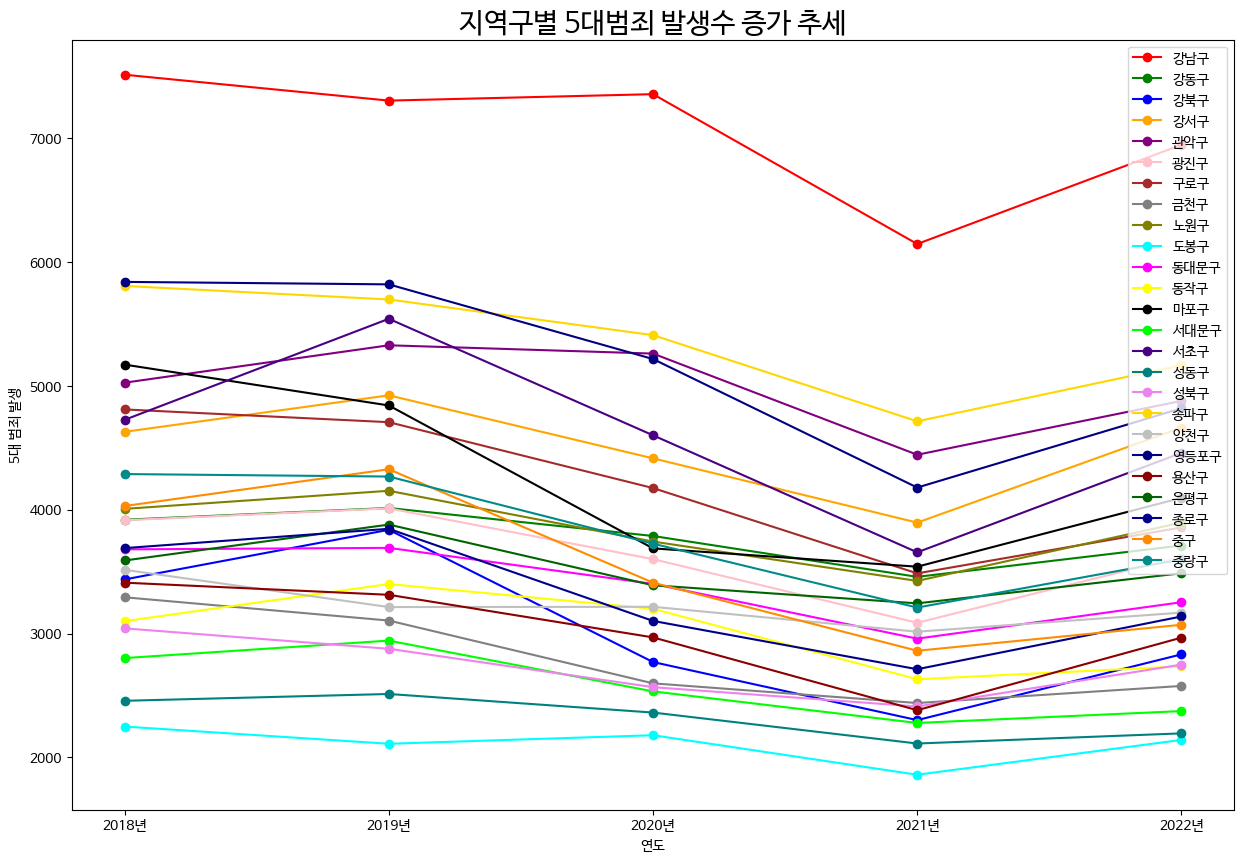

In [ ]:
fig = plt.figure(figsize=(15,10))

# x축
years = ['2018년','2019년','2020년','2021년','2022년']
# 원하는 색상을 직접 선택하여 사용
colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink', 'brown', 'gray', 'olive', 'cyan', 'magenta', 'yellow', 'black', 'lime', 'indigo', 'teal', 'violet', 'gold', 'silver', 'navy', 'darkred', 'darkgreen', 'darkblue', 'darkorange', 'darkcyan', 'darkbrown']

# 캔버스 색상 설정
ax = fig.add_subplot()

# 그림 뼈대(프레임) 생성
# 선 그래프 생성
for i in range(25):
  ch = globals()[chr(i+97)+'_5대범죄']
  ax.plot(years, ch, marker='o', label=arr[i], color=colors[i])

ax.legend()

# 범례
plt.title('지역구별 5대범죄 발생수 증가 추세', fontsize=20)
plt.xlabel('연도')
plt.ylabel('5대 범죄 발생')

# 타이틀 설정
plt.show()

# 6. 서울시 전체의 주거침입 결과

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/GoH project/검증 데이터 만들기/전처리 완료한 엑셀 결과물/231111_1인가구특화범죄.xlsx')
df.head(10)

,년도,지역구,침입방법문단속,침입방법시정장치,침입방법시정장치파손,침입방법문파손,침입방법기타,합계
0,2015,강남구,50,36,117,12,23371,23586
1,2016,강남구,48,42,6,1,23793,23890
2,2017,강남구,49,39,27,19,21034,21168
3,2018,강남구,43,20,1,1,20935,21000
4,2019,강남구,7,13,15,2,20691,20728
5,2015,강동구,29,12,10,1,9385,9437
6,2016,강동구,40,27,19,23,9459,9568
7,2017,강동구,35,23,10,3,8860,8931
8,2018,강동구,5,5,3,0,8250,8263
9,2019,강동구,10,3,4,0,8265,8282


In [ ]:
df2 = df.iloc[:,[0,1,7]]
df2.head()

,년도,지역구,합계
0,2015,강남구,23586
1,2016,강남구,23890
2,2017,강남구,21168
3,2018,강남구,21000
4,2019,강남구,20728


In [ ]:
# 지역구 이름만 추출
f = df2.groupby(['지역구', '년도'])['합계'].mean().reset_index()
a = f.iloc[:,0].unique()
arr = [i.replace("\u3000", "") for i in a]

In [ ]:
# 25개구 데이터 분리
for i in range(25):
  globals()[chr(i+97)+'_df'] = f.iloc[5*i:5*i+5]
  # globals()[chr(i+97)+'_one_house'] = globals()[chr(i+97)+'_df'].iloc[:,1]
  globals()[chr(i+97)+'_주거침입'] = globals()[chr(i+97)+'_df'].iloc[:,2]
  # print(globals()[chr(i+97)+'_df'], globals()[chr(i+97)+'_one_house'], globals()[chr(i+97)+'year'])

print(c_df)
print(c_주거침입)

    지역구    년도      합계
10  강북구  2015  8679.0
11  강북구  2016  8654.0
12  강북구  2017  7876.0
13  강북구  2018  7642.0
14  강북구  2019  8440.0
10    8679.0
11    8654.0
12    7876.0
13    7642.0
14    8440.0
Name: 합계, dtype: float64


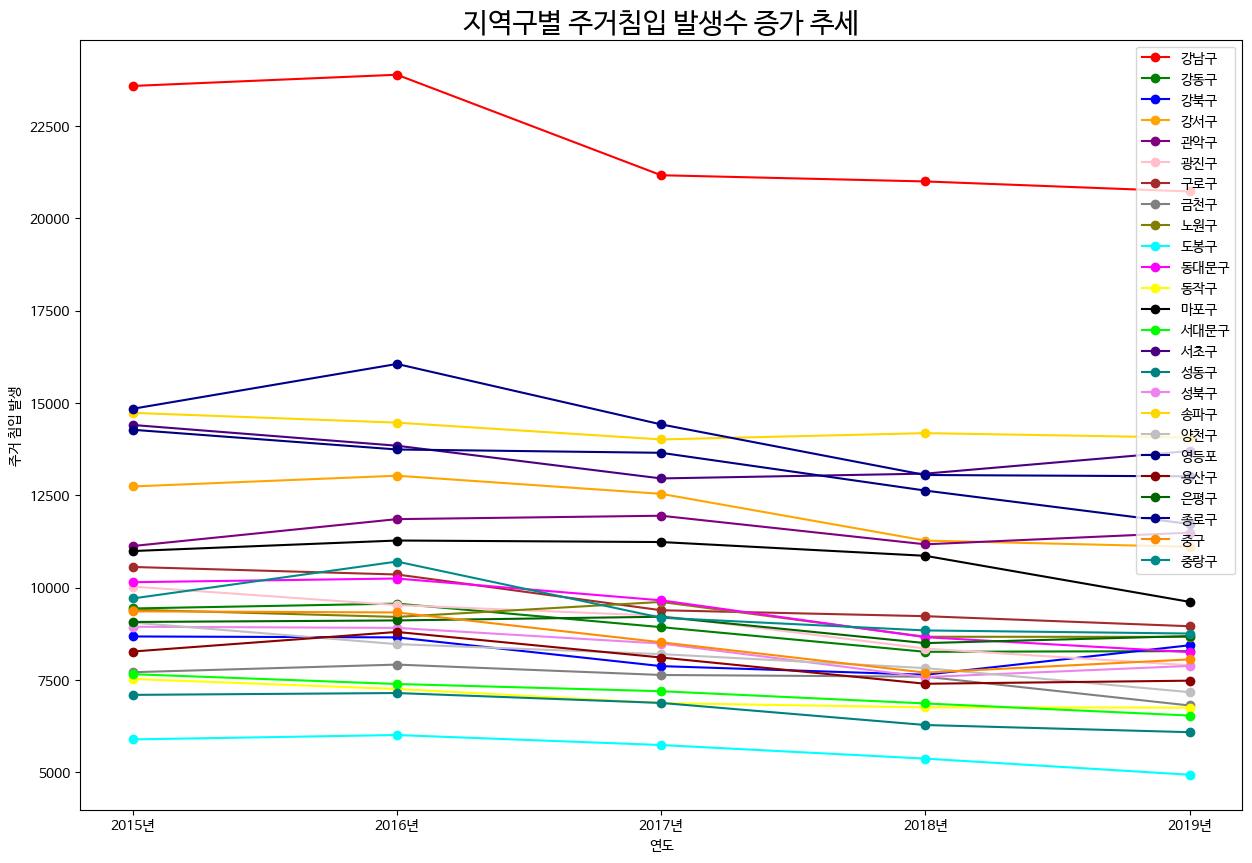

In [ ]:
fig = plt.figure(figsize=(15,10))

# x축
years = ['2015년','2016년','2017년','2018년','2019년']
# 원하는 색상을 직접 선택하여 사용
colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink', 'brown', 'gray', 'olive', 'cyan', 'magenta', 'yellow', 'black', 'lime', 'indigo', 'teal', 'violet', 'gold', 'silver', 'navy', 'darkred', 'darkgreen', 'darkblue', 'darkorange', 'darkcyan', 'darkbrown']

# 캔버스 색상 설정
ax = fig.add_subplot()

# 그림 뼈대(프레임) 생성
# 선 그래프 생성
for i in range(25):
  ch = globals()[chr(i+97)+'_주거침입']
  ax.plot(years, ch, marker='o', label=arr[i], color=colors[i])

ax.legend()

# 범례
plt.title('지역구별 주거침입 발생수 증가 추세', fontsize=20)
plt.xlabel('연도')
plt.ylabel('주거 침입 발생')

# 타이틀 설정
plt.show()